In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('logistic_regression_data.csv')

In [ ]:
df.head()

,Age,Salary,Experience,Purchased
0,58,65222,16,1
1,48,93335,26,0
2,34,40965,2,0
3,27,54538,1,1
4,40,38110,12,0


In [ ]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [ ]:
print(X.shape)
print(y.shape)

(100, 3)
(100,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 3)
(20, 3)
(80,)
(20,)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = LogisticRegression(C = 1, solver = 'lbfgs', max_iter=200) # Changed 'c' to 'C'
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y_test

,Purchased
83,1
53,1
70,0
45,1
44,0
39,0
22,0
80,1
10,1
0,1


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
83,1,0
53,1,0
70,0,0
45,1,0
44,0,0
39,0,0
22,0,0
80,1,1
10,1,1
0,1,0


Model Evulation


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.5
Confusion Matrix:
 [[7 1]
 [9 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.75      0.25      0.38        12

    accuracy                           0.50        20
   macro avg       0.59      0.56      0.48        20
weighted avg       0.62      0.50      0.46        20



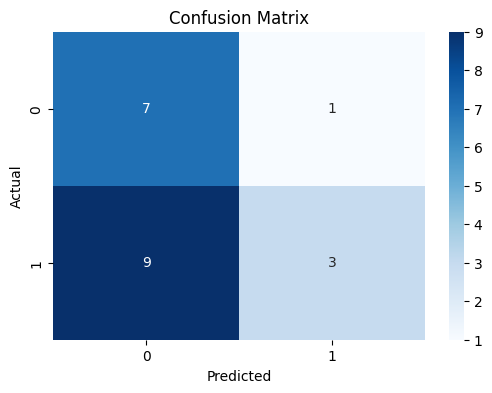

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid_lbfgs = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
    'penalty': ['l2']
}

grid_lbfgs = GridSearchCV(LogisticRegression(), param_grid_lbfgs, cv=5)
grid_lbfgs.fit(X_train, y_train)

# Grid for 'liblinear' solver
param_grid_liblinear = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

grid_liblinear = GridSearchCV(LogisticRegression(), param_grid_liblinear, cv=5)
grid_liblinear.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [ ]:
print(grid_lbfgs.best_estimator_)

LogisticRegression(C=0.01)


In [ ]:
print(grid_lbfgs.best_params_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
model = LogisticRegression(C = 0.01, penalty='l2', solver = 'lbfgs', max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=200)

In [ ]:
# Step 7: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy: ",accuracy)
print("Confusion Matrix: \n",conf_matrix)
print("Classification Report: \n",class_report)

Accuracy:  0.5
Confusion Matrix: 
 [[7 1]
 [9 3]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.75      0.25      0.38        12

    accuracy                           0.50        20
   macro avg       0.59      0.56      0.48        20
weighted avg       0.62      0.50      0.46        20

